In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import warnings
import time
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.inspection import permutation_importance 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
set_config(display="diagram")
warnings.filterwarnings('ignore')
%matplotlib inline

***Reading the data from csv file:***

In [3]:

df = pd.read_csv('data/realtor-data.zip.csv', sep = ',')
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [4]:
df.count()

brokered_by       2221849
status            2226382
price             2224841
bed               1745065
bath              1714611
acre_lot          1900793
street            2215516
city              2224975
state             2226374
zip_code          2226083
house_size        1657898
prev_sold_date    1492085
dtype: int64

### Finding the data for each state in USA

In [5]:

df['state'].value_counts()

state
Florida                 249432
California              227215
Texas                   208335
New York                103159
North Carolina           85745
Illinois                 85280
Georgia                  80977
Pennsylvania             78373
Arizona                  72825
Virginia                 68763
Washington               62461
Ohio                     59207
New Jersey               48199
Maryland                 46052
Missouri                 45145
Minnesota                43412
Michigan                 42429
Wisconsin                42390
South Carolina           42367
Tennessee                40964
Massachusetts            38041
Oklahoma                 37140
Alabama                  34053
Colorado                 32293
Oregon                   32163
Kentucky                 26316
Louisiana                25815
Arkansas                 23045
Iowa                     23033
New Mexico               21074
Indiana                  18840
Idaho                    16760
Mi

### Filtering data with state == 'California'

In [6]:
df_california= df.loc[df['state']=='California']

In [7]:
df_california

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
160666,102093.0,for_sale,3.000000e+06,7.0,6.0,NaN,1760549.0,Balzola,California,0.0,6889.0,NaN
221994,23826.0,for_sale,2.147484e+09,2.0,2.0,0.12,11355.0,International,California,NaN,885.0,NaN
942507,98034.0,for_sale,1.000000e+07,NaN,NaN,123.97,NaN,Playa de Novillero,California,NaN,NaN,NaN
942510,16829.0,for_sale,3.280000e+05,3.0,3.0,NaN,915973.0,Quintana Roo,California,NaN,NaN,NaN
1154530,17458.0,for_sale,1.990000e+05,NaN,NaN,5.10,2937.0,Milford,California,96121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2177843,27315.0,sold,4.594000e+05,3.0,1.0,0.12,227460.0,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177844,93046.0,sold,9.480000e+05,6.0,6.0,NaN,380389.0,South Lake Tahoe,California,96150.0,3757.0,2022-03-07
2177849,84002.0,sold,8.500000e+05,4.0,3.0,0.14,1763021.0,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,31770.0,sold,9.590000e+05,4.0,3.0,0.21,183662.0,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


### Dropping 'brokered_by' column / feature as it will not be useful for determining price

In [8]:

df_california = df_california.drop('brokered_by', axis=1)
df_california

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
160666,for_sale,3.000000e+06,7.0,6.0,NaN,1760549.0,Balzola,California,0.0,6889.0,NaN
221994,for_sale,2.147484e+09,2.0,2.0,0.12,11355.0,International,California,NaN,885.0,NaN
942507,for_sale,1.000000e+07,NaN,NaN,123.97,NaN,Playa de Novillero,California,NaN,NaN,NaN
942510,for_sale,3.280000e+05,3.0,3.0,NaN,915973.0,Quintana Roo,California,NaN,NaN,NaN
1154530,for_sale,1.990000e+05,NaN,NaN,5.10,2937.0,Milford,California,96121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2177843,sold,4.594000e+05,3.0,1.0,0.12,227460.0,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177844,sold,9.480000e+05,6.0,6.0,NaN,380389.0,South Lake Tahoe,California,96150.0,3757.0,2022-03-07
2177849,sold,8.500000e+05,4.0,3.0,0.14,1763021.0,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,sold,9.590000e+05,4.0,3.0,0.21,183662.0,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


### Dropping 'Street' feature/column as it will not be useful for determining price (We will use Zip code instead)

In [9]:
df_california = df_california.drop('street', axis=1)
df_california

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
160666,for_sale,3.000000e+06,7.0,6.0,NaN,Balzola,California,0.0,6889.0,NaN
221994,for_sale,2.147484e+09,2.0,2.0,0.12,International,California,NaN,885.0,NaN
942507,for_sale,1.000000e+07,NaN,NaN,123.97,Playa de Novillero,California,NaN,NaN,NaN
942510,for_sale,3.280000e+05,3.0,3.0,NaN,Quintana Roo,California,NaN,NaN,NaN
1154530,for_sale,1.990000e+05,NaN,NaN,5.10,Milford,California,96121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2177843,sold,4.594000e+05,3.0,1.0,0.12,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177844,sold,9.480000e+05,6.0,6.0,NaN,South Lake Tahoe,California,96150.0,3757.0,2022-03-07
2177849,sold,8.500000e+05,4.0,3.0,0.14,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,sold,9.590000e+05,4.0,3.0,0.21,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


### Dropping 'state' feature/column as it will not be useful for determining price (We will use Zip code instead)

In [10]:
df_california = df_california.drop('state', axis=1)
df_california

,status,price,bed,bath,acre_lot,city,zip_code,house_size,prev_sold_date
160666,for_sale,3.000000e+06,7.0,6.0,NaN,Balzola,0.0,6889.0,NaN
221994,for_sale,2.147484e+09,2.0,2.0,0.12,International,NaN,885.0,NaN
942507,for_sale,1.000000e+07,NaN,NaN,123.97,Playa de Novillero,NaN,NaN,NaN
942510,for_sale,3.280000e+05,3.0,3.0,NaN,Quintana Roo,NaN,NaN,NaN
1154530,for_sale,1.990000e+05,NaN,NaN,5.10,Milford,96121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2177843,sold,4.594000e+05,3.0,1.0,0.12,South Lake Tahoe,96150.0,1160.0,2022-03-07
2177844,sold,9.480000e+05,6.0,6.0,NaN,South Lake Tahoe,96150.0,3757.0,2022-03-07
2177849,sold,8.500000e+05,4.0,3.0,0.14,South Lake Tahoe,96150.0,1956.0,2022-04-22
2177857,sold,9.590000e+05,4.0,3.0,0.21,South Lake Tahoe,96150.0,1824.0,2021-11-23


## Considering only houses which has previous sold date

In [11]:

df_california = df_california[df_california['prev_sold_date'].isnull() == False]
df_california

,status,price,bed,bath,acre_lot,city,zip_code,house_size,prev_sold_date
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,92225.0,1132.0,1984-06-29
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,92225.0,1100.0,1997-09-23
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,92225.0,3126.0,2015-09-23
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,92225.0,1925.0,1985-01-14
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,92225.0,1642.0,2018-03-08
...,...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,South Lake Tahoe,96150.0,1160.0,2022-03-07
2177844,sold,948000.0,6.0,6.0,NaN,South Lake Tahoe,96150.0,3757.0,2022-03-07
2177849,sold,850000.0,4.0,3.0,0.14,South Lake Tahoe,96150.0,1956.0,2022-04-22
2177857,sold,959000.0,4.0,3.0,0.21,South Lake Tahoe,96150.0,1824.0,2021-11-23


### Change sold date to sold year as it will be more appropriate to use year than actual data in regression :

In [12]:
df_california['sold_year'] = pd.to_datetime(df_california['prev_sold_date']).dt.year
df_california

,status,price,bed,bath,acre_lot,city,zip_code,house_size,prev_sold_date,sold_year
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,92225.0,1132.0,1984-06-29,1984
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,92225.0,1100.0,1997-09-23,1997
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,92225.0,3126.0,2015-09-23,2015
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,92225.0,1925.0,1985-01-14,1985
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,92225.0,1642.0,2018-03-08,2018
...,...,...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,South Lake Tahoe,96150.0,1160.0,2022-03-07,2022
2177844,sold,948000.0,6.0,6.0,NaN,South Lake Tahoe,96150.0,3757.0,2022-03-07,2022
2177849,sold,850000.0,4.0,3.0,0.14,South Lake Tahoe,96150.0,1956.0,2022-04-22,2022
2177857,sold,959000.0,4.0,3.0,0.21,South Lake Tahoe,96150.0,1824.0,2021-11-23,2021


### Dropping sold date as we have added sold year for our regression model

In [13]:
df_california = df_california.drop('prev_sold_date', axis=1)
df_california

,status,price,bed,bath,acre_lot,city,zip_code,house_size,sold_year
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,92225.0,1132.0,1984
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,92225.0,1100.0,1997
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,92225.0,3126.0,2015
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,92225.0,1925.0,1985
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,92225.0,1642.0,2018
...,...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,South Lake Tahoe,96150.0,1160.0,2022
2177844,sold,948000.0,6.0,6.0,NaN,South Lake Tahoe,96150.0,3757.0,2022
2177849,sold,850000.0,4.0,3.0,0.14,South Lake Tahoe,96150.0,1956.0,2022
2177857,sold,959000.0,4.0,3.0,0.21,South Lake Tahoe,96150.0,1824.0,2021


In [14]:
# Check remaming features and data types
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193018 entries, 1208998 to 2177858
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      193018 non-null  object 
 1   price       193017 non-null  float64
 2   bed         177926 non-null  float64
 3   bath        177220 non-null  float64
 4   acre_lot    175453 non-null  float64
 5   city        192993 non-null  object 
 6   zip_code    193015 non-null  float64
 7   house_size  179642 non-null  float64
 8   sold_year   193018 non-null  int32  
dtypes: float64(6), int32(1), object(2)
memory usage: 14.0+ MB


### We are calculating average acre lot size and filling the null values with average value :

In [15]:
df_california['acre_lot'].describe()

count    175453.000000
mean         20.992189
std        1130.614511
min           0.000000
25%           0.130000
50%           0.170000
75%           0.340000
max      100000.000000
Name: acre_lot, dtype: float64

In [16]:
df_california['acre_lot'].isnull().sum()

17565

In [17]:
values = {"acre_lot": 21}
df_california = df_california.fillna(value=values)


In [18]:
df_california['acre_lot'].isnull().sum()

0

### We are calculating average bed number and filling the null values with average value :

In [19]:
df_california['bed'].describe()

count    177926.000000
mean          3.274277
std           1.686748
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max         108.000000
Name: bed, dtype: float64

In [20]:
df_california['bed'].isnull().sum()

15092

In [21]:
values = {"bed": 3.0}
df_california = df_california.fillna(value=values)


In [22]:
df_california['bed'].isnull().sum()

0

### We are calculating average bath number and filling the null values with average value :

In [23]:
df_california['bath'].isnull().sum()

15798

In [24]:
df_california['bath'].describe()

count    177220.00000
mean          2.52322
std           1.50081
min           1.00000
25%           2.00000
50%           2.00000
75%           3.00000
max         108.00000
Name: bath, dtype: float64

In [25]:
values = {"bath": 2.0}
df_california = df_california.fillna(value=values)

In [26]:
df_california['bath'].isnull().sum()

0

### We are calculating average house size and filling the null values with average value :

In [27]:
df_california['house_size'].describe()

count    179642.000000
mean       1910.683493
std        1418.086570
min         100.000000
25%        1223.000000
50%        1617.000000
75%        2215.000000
max      140000.000000
Name: house_size, dtype: float64

In [28]:
df_california['house_size'].isnull().sum()

13376

In [29]:
values = {"house_size": 1910.0}
df_california = df_california.fillna(value=values)

In [30]:
df_california['house_size'].isnull().sum()

0

In [31]:
df_california

,status,price,bed,bath,acre_lot,city,zip_code,house_size,sold_year
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,92225.0,1132.0,1984
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,92225.0,1100.0,1997
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,92225.0,3126.0,2015
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,92225.0,1925.0,1985
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,92225.0,1642.0,2018
...,...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,South Lake Tahoe,96150.0,1160.0,2022
2177844,sold,948000.0,6.0,6.0,21.00,South Lake Tahoe,96150.0,3757.0,2022
2177849,sold,850000.0,4.0,3.0,0.14,South Lake Tahoe,96150.0,1956.0,2022
2177857,sold,959000.0,4.0,3.0,0.21,South Lake Tahoe,96150.0,1824.0,2021


### Now that we refilled null values with average values for various fields we will delete rest of the null values :

In [32]:
df_california = df_california.dropna()
df_california

,status,price,bed,bath,acre_lot,city,zip_code,house_size,sold_year
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,92225.0,1132.0,1984
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,92225.0,1100.0,1997
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,92225.0,3126.0,2015
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,92225.0,1925.0,1985
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,92225.0,1642.0,2018
...,...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,South Lake Tahoe,96150.0,1160.0,2022
2177844,sold,948000.0,6.0,6.0,21.00,South Lake Tahoe,96150.0,3757.0,2022
2177849,sold,850000.0,4.0,3.0,0.14,South Lake Tahoe,96150.0,1956.0,2022
2177857,sold,959000.0,4.0,3.0,0.21,South Lake Tahoe,96150.0,1824.0,2021


In [33]:
## Making sure no null values in remaining in our dataset
df_null = df_california.isna().sum()
df_null

status        0
price         0
bed           0
bath          0
acre_lot      0
city          0
zip_code      0
house_size    0
sold_year     0
dtype: int64

In [34]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192989 entries, 1208998 to 2177858
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      192989 non-null  object 
 1   price       192989 non-null  float64
 2   bed         192989 non-null  float64
 3   bath        192989 non-null  float64
 4   acre_lot    192989 non-null  float64
 5   city        192989 non-null  object 
 6   zip_code    192989 non-null  float64
 7   house_size  192989 non-null  float64
 8   sold_year   192989 non-null  int32  
dtypes: float64(6), int32(1), object(2)
memory usage: 14.0+ MB


In [35]:
#df_california_sold['acre_lot'].isnull().value_counts()
df_california['city'].value_counts()

city
Los Angeles           7913
San Diego             6744
Sacramento            5360
San Jose              4679
San Francisco         4048
                      ... 
Linda Vista              1
Sd                       1
Fallbrook Bonsall        1
Ocotillo Wells           1
Blairsden Graeagle       1
Name: count, Length: 1359, dtype: int64

### Checking histogram for our dataset for house prices 

array([[<Axes: title={'center': 'price'}>]], dtype=object)

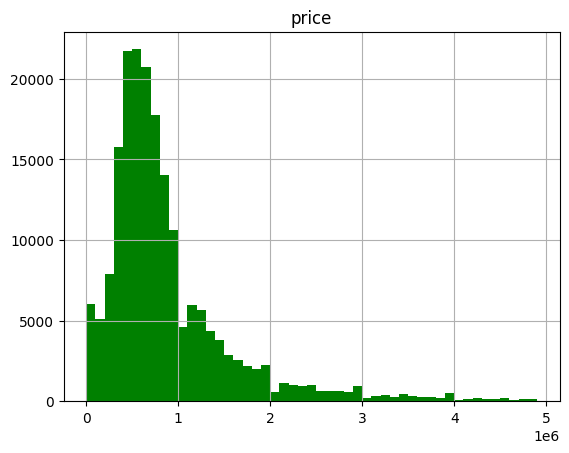

In [36]:
bins = range(0,5000000,100000)
df_california.hist(column='price', color='green', bins=bins)

array([[<Axes: title={'center': 'house_size'}>]], dtype=object)

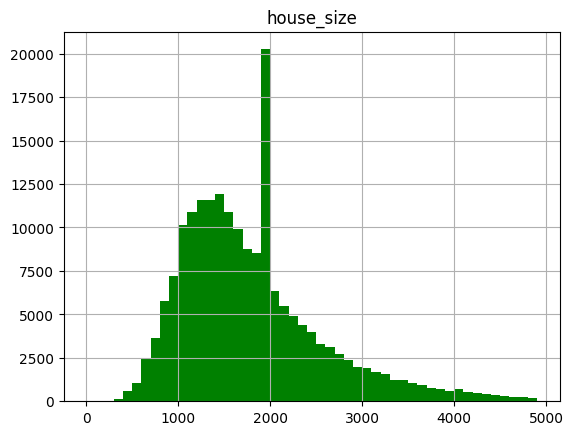

In [37]:
bins = range(0,5000,100)
df_california.hist(column='house_size', color='green', bins=bins)

array([[<Axes: title={'center': 'sold_year'}>]], dtype=object)

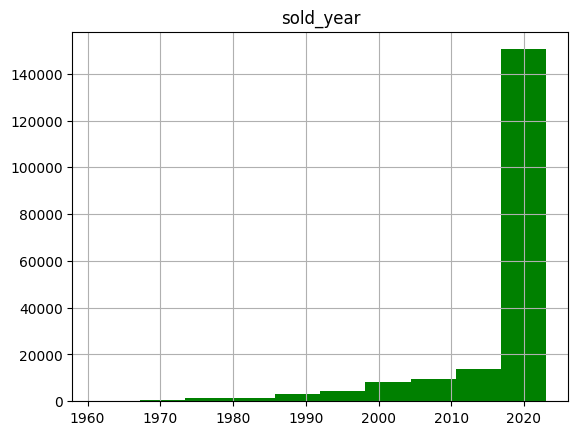

In [38]:

df_california.hist(column='sold_year', color='green')

### Checking scatter plot price Vs city

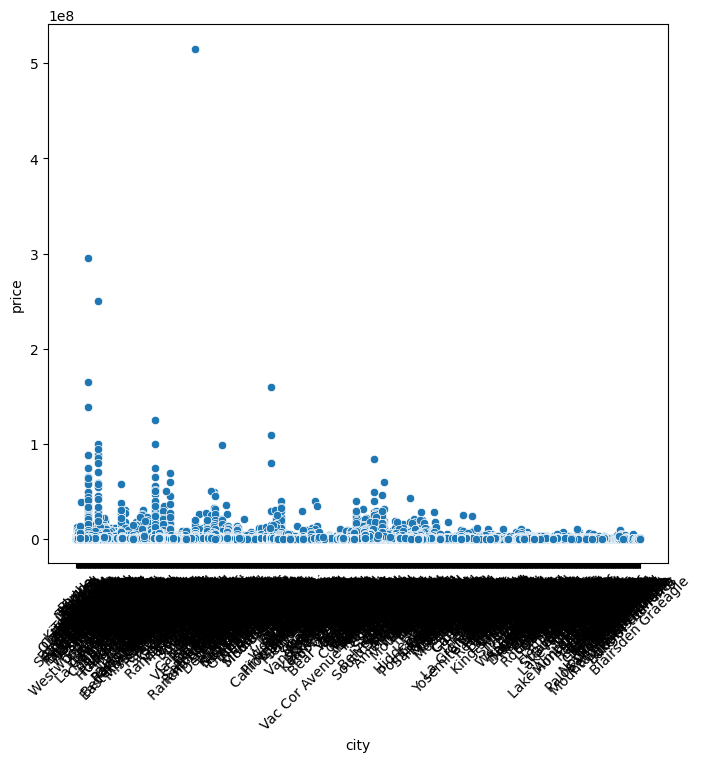

In [39]:
plt.figure(figsize = (8,7))
sns.scatterplot(data=df_california, x = "city", y = "price")
plt.xticks(rotation = 45)
plt.show()

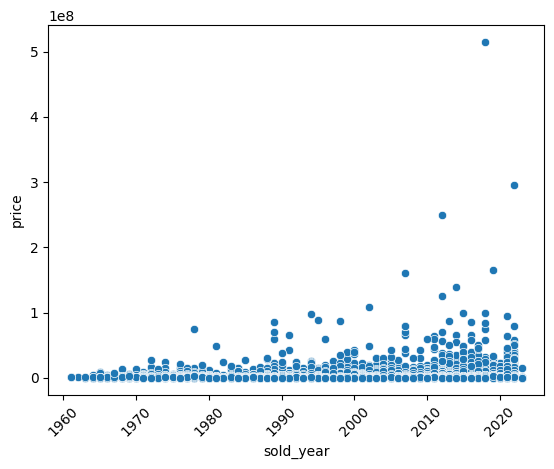

In [40]:

sns.scatterplot(data=df_california, x = "sold_year", y = "price")
plt.xticks(rotation = 45)
plt.show()

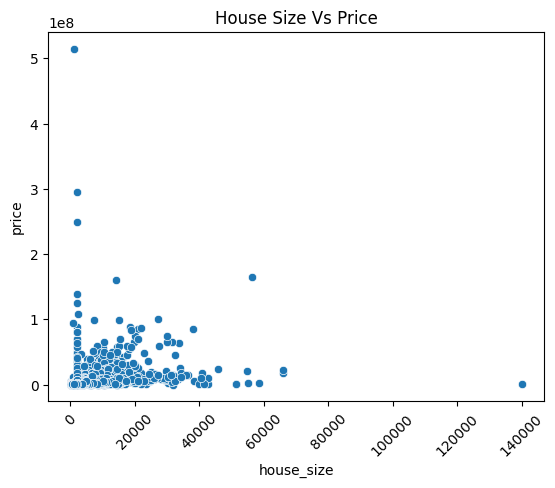

In [71]:

sns.scatterplot(data=df_california, x = "house_size", y = "price")
plt.title("House Size Vs Price")
plt.xticks(rotation = 45)
plt.show()

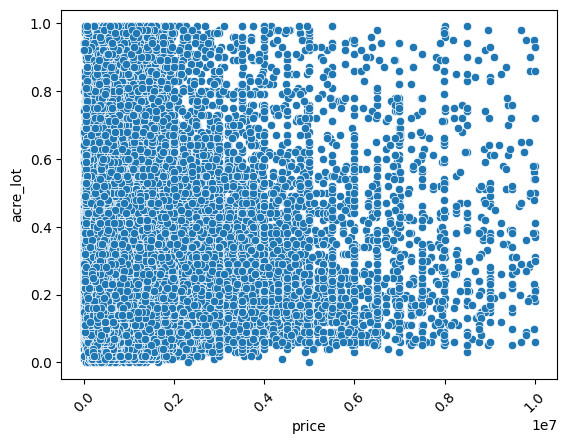

In [42]:
df_california_remove_outlier = df_california.loc[df_california['price']<10000000 ]
df_california_remove_outlier = df_california_remove_outlier.loc[df_california_remove_outlier['acre_lot']<1 ]
sns.scatterplot(data=df_california_remove_outlier, x = "price", y = "acre_lot")
plt.xticks(rotation = 45)
plt.show()

### We are trying to create a new feature named avg_zip_price . This is calculated as average price for all the houses listed in each zipcode. This way we can make use of zip code parameter correctly. We will then delete Zipcode feature. 

In [43]:
group_zip = df_california.groupby("zip_code")
group_zip

In [44]:
avg_zip_price = group_zip['price'].sum() / group_zip['price'].count()
avg_zip_price_map = avg_zip_price.to_dict()
avg_zip_price_map

{90001.0: 608632.6075949367,
 90002.0: 577801.676056338,
 90003.0: 685536.4204545454,
 90004.0: 2040137.0135135136,
 90005.0: 1533837.1333333333,
 90006.0: 1397318.956284153,
 90007.0: 1601457.98,
 90008.0: 1268000.9126984128,
 90010.0: 1287709.375,
 90011.0: 799011.4237288135,
 90012.0: 799049.73,
 90013.0: 763422.7121212122,
 90014.0: 757403.8076923077,
 90015.0: 1025849.6047904191,
 90016.0: 1225866.6878980892,
 90017.0: 836279.472972973,
 90018.0: 1156042.060150376,
 90019.0: 1665475.152,
 90020.0: 2180109.0757575757,
 90021.0: 2178285.714285714,
 90022.0: 771601.6794871795,
 90023.0: 764722.484375,
 90024.0: 3409573.9866220737,
 90025.0: 1485696.6706827309,
 90026.0: 1531851.9581395348,
 90027.0: 2377955.716666667,
 90028.0: 1856996.1851851852,
 90029.0: 1671761.98,
 90031.0: 905017.2340425532,
 90032.0: 762785.6234567901,
 90033.0: 1118409.1846153846,
 90034.0: 1822247.85,
 90035.0: 1595108.1272727272,
 90036.0: 2235191.3773584906,
 90037.0: 919432.8421052631,
 90038.0: 1796866.4

In [45]:
# Update our data frame with average price of house for the specific zip code
def zip_avg_price(num):
    for val, label in avg_zip_price_map.items():
        if val == num:
            return label

# Call the age function
df_california['zip_code_avg_price'] = df_california['zip_code'].apply(zip_avg_price)

In [46]:
df_california.sample(10)

,status,price,bed,bath,acre_lot,city,zip_code,house_size,sold_year,zip_code_avg_price
1325313,for_sale,559000.0,1.0,2.0,2.72,Oakland,94607.0,1111.0,2015,7.061370e+05
2066080,sold,405999.0,1.0,1.0,21.00,Seal Beach,90740.0,729.0,2022,7.177725e+05
2060932,sold,1099000.0,4.0,2.0,0.22,Northridge,91325.0,2380.0,2022,1.027116e+06
2069908,sold,950000.0,4.0,2.0,0.12,Long Beach,90815.0,1678.0,2021,1.014431e+06
2118334,sold,565000.0,3.0,2.0,0.08,Oxnard,93035.0,1676.0,2022,1.348518e+06
2091756,sold,840000.0,3.0,2.0,0.10,Lake Forest,92610.0,1275.0,2022,1.026948e+06
2139193,sold,689000.0,3.0,2.0,0.45,American Canyon,94503.0,1428.0,2022,6.405136e+05
2141938,sold,389000.0,2.0,2.0,21.00,Concord,94521.0,973.0,2022,7.915349e+05
1325516,for_sale,775000.0,1.0,1.0,0.74,San Francisco,94105.0,582.0,2007,1.796567e+06
2081342,sold,510000.0,3.0,3.0,0.04,San Dimas,91773.0,1496.0,2022,8.383462e+05


In [47]:
df_california = df_california.drop('zip_code', axis=1)
df_california

,status,price,bed,bath,acre_lot,city,house_size,sold_year,zip_code_avg_price
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,1132.0,1984,301611.762500
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,1100.0,1997,301611.762500
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,3126.0,2015,301611.762500
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,1925.0,1985,301611.762500
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,1642.0,2018,301611.762500
...,...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,South Lake Tahoe,1160.0,2022,858453.172324
2177844,sold,948000.0,6.0,6.0,21.00,South Lake Tahoe,3757.0,2022,858453.172324
2177849,sold,850000.0,4.0,3.0,0.14,South Lake Tahoe,1956.0,2022,858453.172324
2177857,sold,959000.0,4.0,3.0,0.21,South Lake Tahoe,1824.0,2021,858453.172324


In [48]:
df_california = df_california.drop('city', axis=1)
df_california

,status,price,bed,bath,acre_lot,house_size,sold_year,zip_code_avg_price
1208998,for_sale,172999.0,3.0,2.0,0.16,1132.0,1984,301611.762500
1209113,for_sale,201000.0,2.0,2.0,0.34,1100.0,1997,301611.762500
1209116,for_sale,250000.0,7.0,3.0,0.19,3126.0,2015,301611.762500
1209118,for_sale,325000.0,3.0,2.0,5.00,1925.0,1985,301611.762500
1209120,for_sale,287500.0,5.0,3.0,0.20,1642.0,2018,301611.762500
...,...,...,...,...,...,...,...,...
2177843,sold,459400.0,3.0,1.0,0.12,1160.0,2022,858453.172324
2177844,sold,948000.0,6.0,6.0,21.00,3757.0,2022,858453.172324
2177849,sold,850000.0,4.0,3.0,0.14,1956.0,2022,858453.172324
2177857,sold,959000.0,4.0,3.0,0.21,1824.0,2021,858453.172324


**Dividing data into Train and Test sets**

In [49]:
# Drop target variable
X = df_california.drop('price', axis=1) 
y = df_california['price']

In [50]:
# create train and test sets 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.65, random_state=42) 
print('Shape of X training: ', X_tr.shape ) 
print('Shape of y training: ', y_tr.shape ) 
print('Shape of X testing: ', X_te.shape ) 
print('Shape of y testing: ', y_te.shape ) 

Shape of X training:  (125442, 7)
Shape of y training:  (125442,)
Shape of X testing:  (67547, 7)
Shape of y testing:  (67547,)


### Categorical Feature and Numeric Feature

In [51]:
cat_features = ['status']

num_features = ['bed', 'bath', 'acre_lot', 'zip_code_avg_price','house_size','sold_year']

## Linear Regression

In [52]:

# Create a preprocessor
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('categoric', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create pipeline
pipe_1_lr = Pipeline([('preprocessor', preprocessor_lr),('Model',LinearRegression())])

# Fit the model
pipe_1_lr.fit(X_tr,y_tr)
pipe_1_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['bed', 'bath', 'acre_lot',
                                                   'zip_code_avg_price',
                                                   'house_size', 'sold_year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['status'])])),
                ('Model', LinearRegression())])

In [53]:
#Predictions with Linear Regression

y_tr_pred_lr = pipe_1_lr.predict(X_tr)
y_te_pred_lr = pipe_1_lr.predict(X_te)
print(y_tr_pred_lr)
print(y_te_pred_lr)

[ 690008.10347958  549871.42358927 1747633.22621483 ...  660834.59801732
 1056988.09553176  571933.81675676]
[1279480.88153188  638147.7927856   884772.70450387 ...  302158.57577436
  458991.64803211  677317.98306114]


In [54]:
#Calculte MSE

training_MSE_lr = mean_squared_error(y_tr, y_tr_pred_lr)
test_MSE_lr = mean_squared_error(y_te, y_te_pred_lr)
print('Training MSE: ',training_MSE_lr)
print('Testing MSE : ', test_MSE_lr)

Training MSE:  1323823432271.8708
Testing MSE :  5479311779422.371


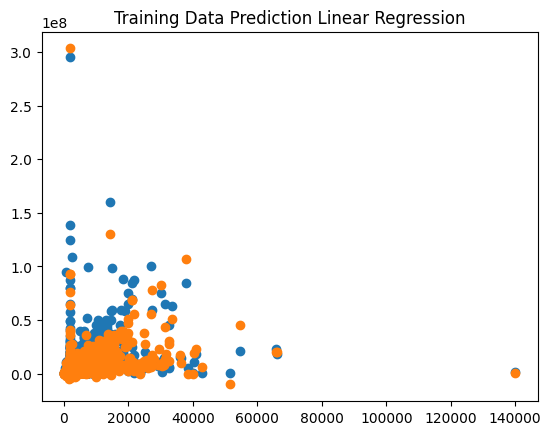

In [55]:
plt.scatter(X_tr['house_size'], y_tr);
plt.scatter(X_tr['house_size'], y_tr_pred_lr);
plt.title("Training Data Prediction Linear Regression")
plt.show()

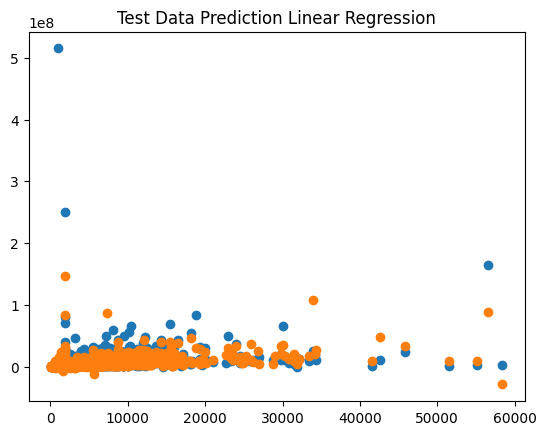

In [56]:
plt.scatter(X_te['house_size'], y_te);
plt.scatter(X_te['house_size'], y_te_pred_lr);
plt.title("Test Data Prediction Linear Regression")
plt.show()

## Ridge Regression

In [57]:
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(PolynomialFeatures(degree=3, include_bias=False), StandardScaler()), num_features),
        ('cat', make_pipeline(OneHotEncoder()), cat_features)
    ])

parameters_to_try = {'regressor__alpha': [0.1, 1, 10, 100, 1000, 2500, 5000]}
grid_search_cv = GridSearchCV(
    estimator=TransformedTargetRegressor(regressor = Ridge(max_iter=100), func=np.log1p, inverse_func=np.expm1),
    param_grid=parameters_to_try,
    scoring='neg_mean_squared_error',
    cv=[[list(range(len(X_tr))), list(range(len(X_te)))]])

# Create a pipeline with the grid search
grid_search_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_ridge),
    ('grid_search', grid_search_cv)
])

grid_search_pipe.fit(X_tr, y_tr)

#Print the best parameters
print("Best params:", grid_search_pipe.named_steps['grid_search'].best_params_)

#Print the best score
print("Best score:", -grid_search_pipe.named_steps['grid_search'].best_score_)

Best params: {'regressor__alpha': 2500}
Best score: 2331794773656.7007


In [58]:

# Create a preprocessor
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('categoric', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create pipeline
pipe_1_ridge = Pipeline([('preprocessor', preprocessor_ridge),('Model',Ridge(alpha=2500))])
pipe_1_ridge.fit(X_tr,y_tr)
pipe_1_ridge

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['bed', 'bath', 'acre_lot',
                                                   'zip_code_avg_price',
                                                   'house_size', 'sold_year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['status'])])),
                ('Model', Ridge(alpha=2500))])

In [59]:
# prediction for training as well as testing
y_tr_pred_ridge = pipe_1_ridge.predict(X_tr)
y_te_pred_ridge = pipe_1_ridge.predict(X_te)

In [60]:
#Calculte MSE

training_MSE_ridge = mean_squared_error(y_tr, y_tr_pred_ridge)
test_MSE_ridge = mean_squared_error(y_te, y_te_pred_ridge)
print('Training MSE: ',training_MSE_ridge)
print('Testing MSE : ', test_MSE_ridge)

Training MSE:  1328058821843.0886
Testing MSE :  5379682351168.242


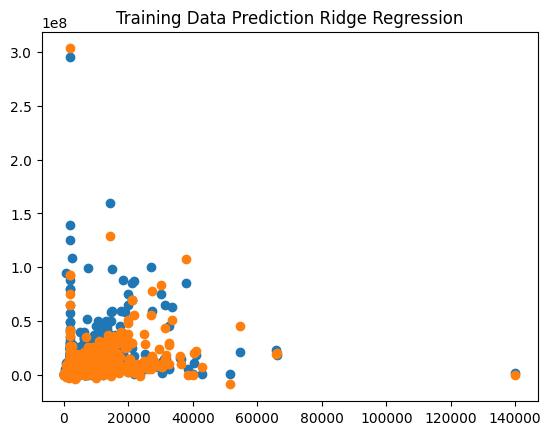

In [61]:
plt.scatter(X_tr['house_size'], y_tr);
plt.scatter(X_tr['house_size'], y_tr_pred_ridge);
plt.title("Training Data Prediction Ridge Regression")
plt.show()

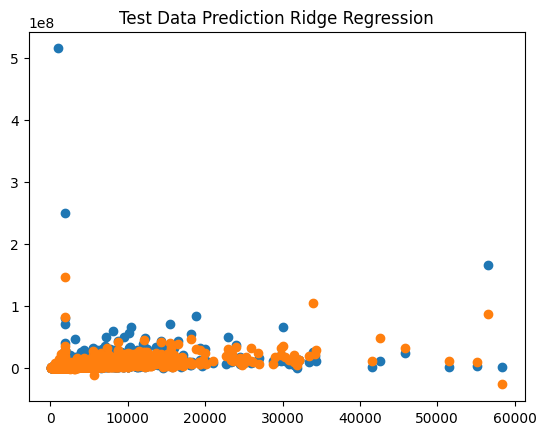

In [62]:
plt.scatter(X_te['house_size'], y_te);
plt.scatter(X_te['house_size'], y_te_pred_ridge);
plt.title("Test Data Prediction Ridge Regression")
plt.show()

## Lasso Regression

In [63]:
preprocessor_lasso = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(PolynomialFeatures(degree=3, include_bias=False), StandardScaler()), num_features),
        ('cat', make_pipeline(OneHotEncoder()), cat_features)
    ])

parameters_to_try = {'regressor__alpha': [0.1, 1, 10, 100, 1000]}
grid_search_cv = GridSearchCV(
    estimator=TransformedTargetRegressor(regressor = Lasso(max_iter=100), func=np.log1p, inverse_func=np.expm1),
    param_grid=parameters_to_try,
    scoring='neg_mean_squared_error',
    cv=[[list(range(len(X_tr))), list(range(len(X_te)))]])

# Create a pipeline with the grid search
grid_search_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_lasso),
    ('grid_search', grid_search_cv)
])

grid_search_pipe.fit(X_tr, y_tr)

#Print the best parameters
print("Best params:", grid_search_pipe.named_steps['grid_search'].best_params_)

#Print the best score
print("Best score:", -grid_search_pipe.named_steps['grid_search'].best_score_)

Best params: {'regressor__alpha': 1}
Best score: 4240159812993.0703


In [64]:
# Create a preprocessor
preprocessor_lasso = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('categoric', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create pipeline
pipe_1_lasso = Pipeline([('preprocessor', preprocessor_lasso),('regressor',Lasso(alpha=1))])
pipe_1_lasso.fit(X_tr,y_tr)
pipe_1_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['bed', 'bath', 'acre_lot',
                                                   'zip_code_avg_price',
                                                   'house_size', 'sold_year']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['status'])])),
                ('regressor', Lasso(alpha=1))])

In [65]:
# prediction for training as well as testing
y_tr_pred_lasso = pipe_1_lasso.predict(X_tr)
y_te_pred_lasso = pipe_1_lasso.predict(X_te)

In [66]:
#Calculte MSE

training_MSE_lasso = mean_squared_error(y_tr, y_tr_pred_lasso)
test_MSE_lasso = mean_squared_error(y_te, y_te_pred_lasso)
print('Training MSE: ',training_MSE_lasso)
print('Testing MSE : ', test_MSE_lasso)

Training MSE:  1329747483217.573
Testing MSE :  5339196067502.367


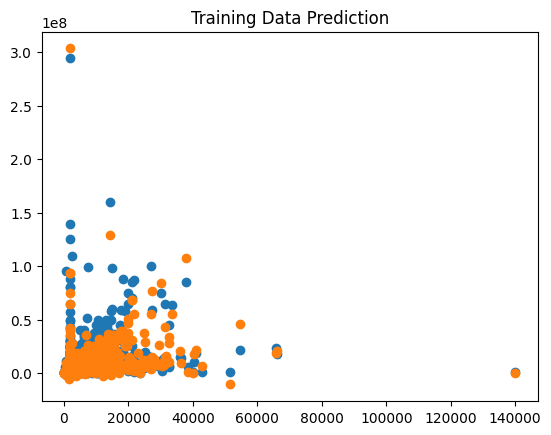

In [67]:
plt.scatter(X_tr['house_size'], y_tr);
plt.scatter(X_tr['house_size'], y_tr_pred_lasso);
plt.title("Training Data Prediction")
plt.show()

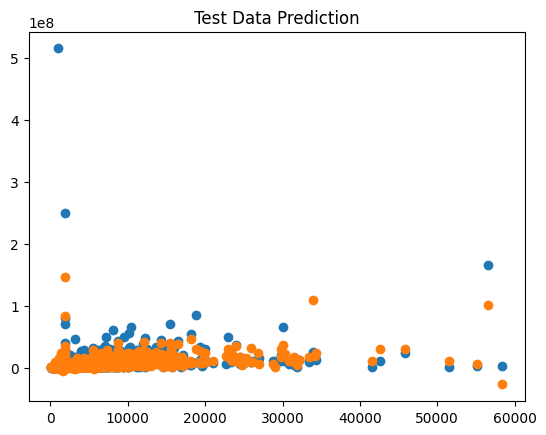

In [68]:
plt.scatter(X_te['house_size'], y_te);
plt.scatter(X_te['house_size'], y_te_pred_lasso);
plt.title("Test Data Prediction")
plt.show()


## Comparison of Models with respect to MSE :


In [69]:
data = [['Linear', 1200878415091.429, 'Training'], ['Linear', 8211797145406.575, 'Testing'], ['Ridge', 1215985853378.8967, 'Training'], ['Ridge', 6898068585338.281, 'Testing'], ['Lasso', 1207524531403.9312, 'Training'], ['Lasso', 7693837475611.407, 'Testing']]

# Create the pandas DataFrame
df_mse = pd.DataFrame(data, columns=['Model', 'MSE', 'Type'])

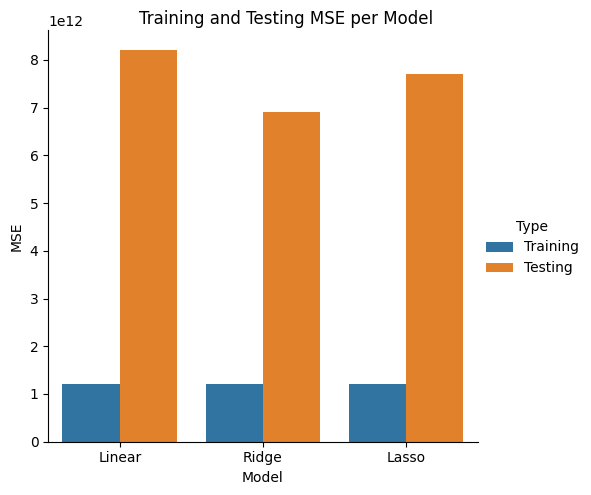

In [70]:
cp = sns.catplot(data=df_mse, x="Model", y="MSE", hue="Type", kind="bar")
cp.fig.suptitle('Training and Testing MSE per Model')
plt.show()

 ### Calculating Importance of features for Linear Regression Model 

In [72]:
perm_imp = permutation_importance(pipe_1_lr, X_te, y_te)
imp = pd.DataFrame(data=perm_imp.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(imp)

                    Importance
zip_code_avg_price    0.284639
house_size            0.219486
bath                  0.199430
bed                   0.105935
sold_year             0.009476
status                0.000768
acre_lot             -0.008641
